In [6]:

import matplotlib.pyplot as plt
import pandas as pd

import rlcache.utils.visualiser as viz
plt.close('all')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
res_df = pd.DataFrame()
errs_df = pd.DataFrame()

In [80]:
mean_rl, std_rl = viz.calculate_hitrate('results/rl_caching_strategy/cache_capacity_5000/')
res_df['rlcache'] = mean_rl
errs_df['rlcache'] = std_rl

In [140]:
res_df

,rlcache,write_always
write_ratio,,
0,0.474762,0.474417
5,0.390665,0.376347
10,0.346741,0.311918
25,0.238763,0.199701
50,0.113306,0.105049
100,0.000000,0.000000


In [51]:
mean_simple, std_simple  = viz.calculate_hitrate('results/simple_strategy/cache_capacity_5000/')
res_df['write_always'] =  mean_simple
errs_df['write_always'] = std_simple

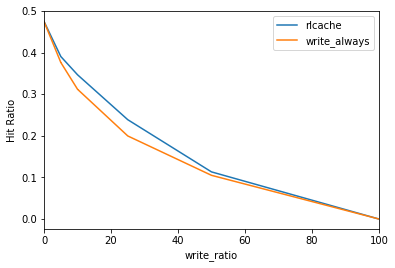

In [112]:

viz.plot_hitrate(res_df, errs_df)
errs_df = errs_df.fillna(0)

In [119]:
res = viz.calculate_hitrate_on_varying_capacity('results/simple_strategy')


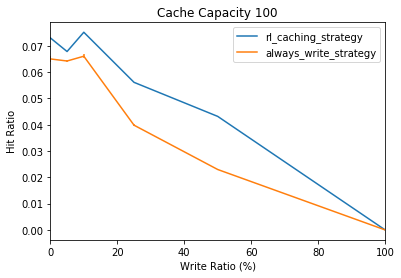

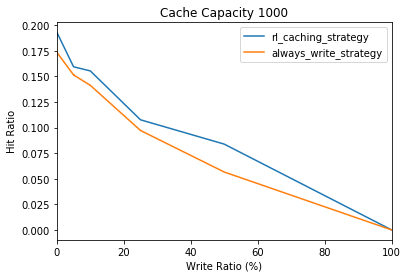

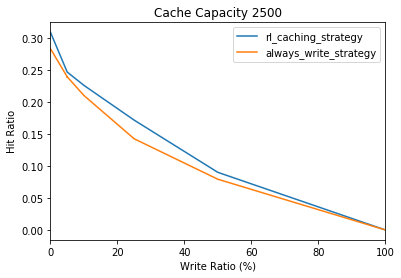

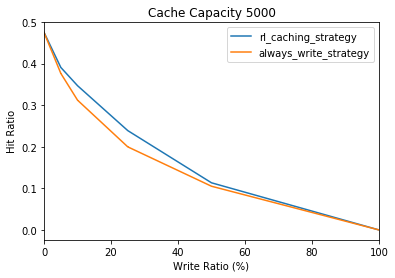

In [144]:
viz.save_everything_hit_rate('results',
                             ['rl_caching_strategy', 'simple_strategy'],
                             'plots/caching_strategy',
                             overwrite_cols={'simple_strategy': 'always_write_strategy'})

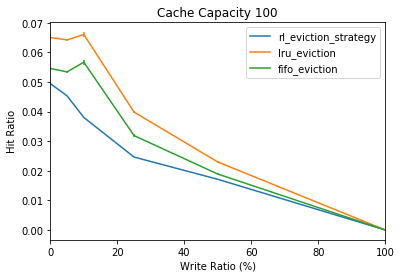

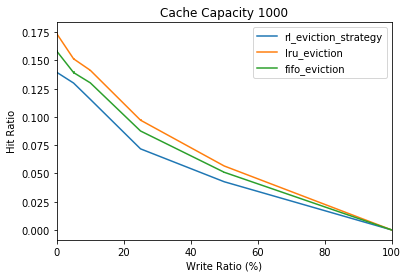

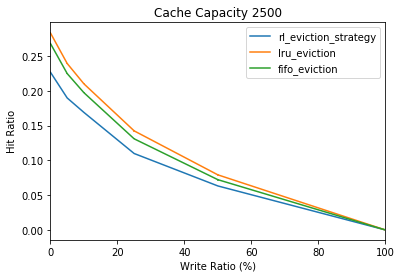

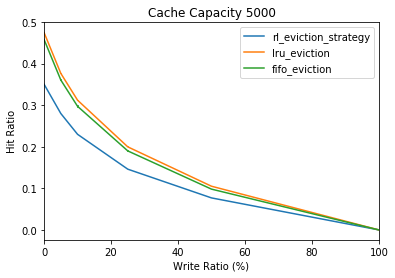

In [147]:

viz.save_everything_hit_rate('results',
                             ['rl_eviction_strategy', 
                              'simple_strategy',
                              'simple_strategy_fifo'],
                             'plots/eviction_strategy',
                             overwrite_cols={'simple_strategy': 'lru_eviction', 
                                             'simple_strategy_fifo': 'fifo_eviction'})